# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Importing the data set
df=pd.read_csv('HR_Employee.csv')

In [44]:
#checking the shape of the dataset
df.shape

(1470, 35)

We have 1470 rows and 35 columns.

In [45]:
#AS the no. of clomns are high, to view all columns using the following code
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [47]:
#cheking column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Attrition- Target variable

Rest of the column- Independent variables

In [48]:
#Checking data type
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Target variable is of object type, it is categorical.

In [49]:
#Checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

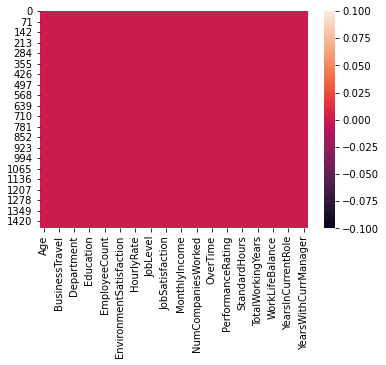

In [50]:
sns.heatmap(df.isnull())

There is no null value in our dataset.

In [51]:
#describing the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The minimum age is 18 and maximum is 60. Average age of employees is 36 years.

Daily rates of employee vary from 102 to 1499.

Maximum distance of a employee's home from office is 29km.

Hourly rates vary from 30 to 100.

Monthly rate ranges from 2094 to 26999.

Monthly income ranges from 1009 to 19999.

Percentage of salary hike starts from 11% to maximum 25%.

Standard hours are 80hrs.

Maximum years at company is 40 years, it means that the oldest employee of the company is working from last 40 years in the company.


# Visualization:

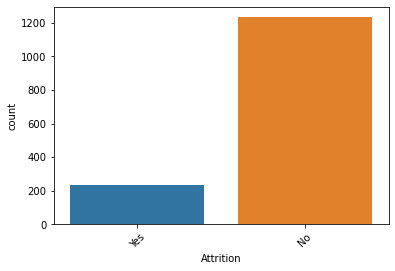

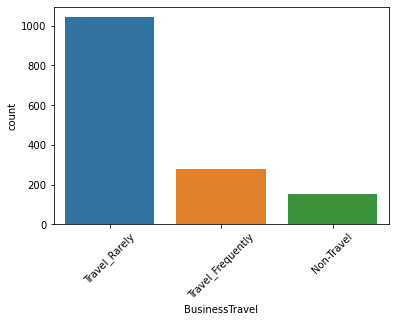

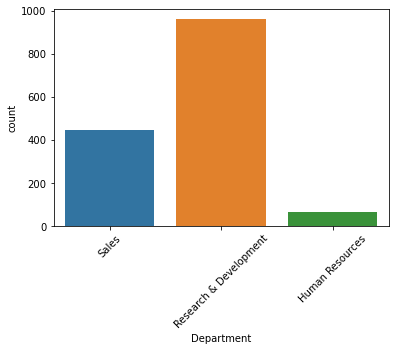

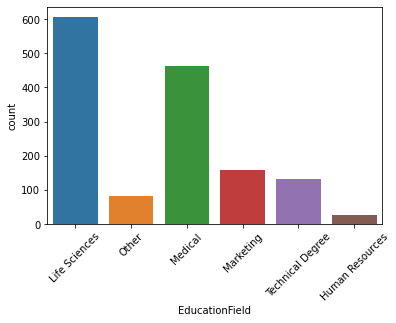

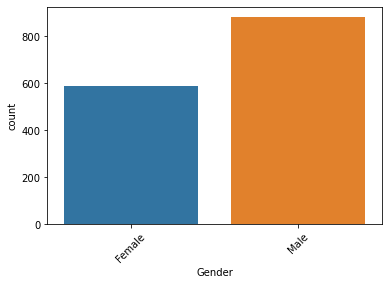

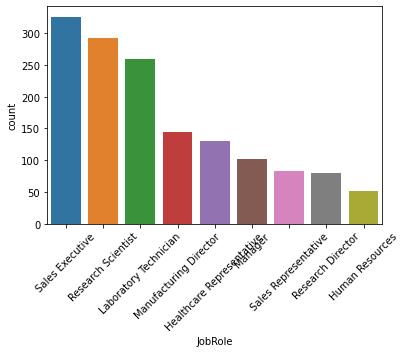

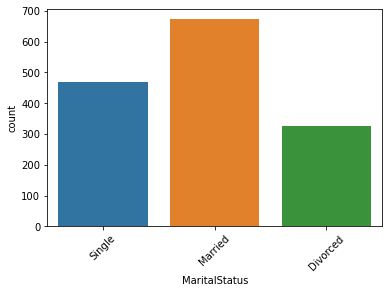

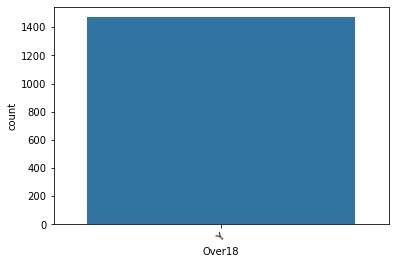

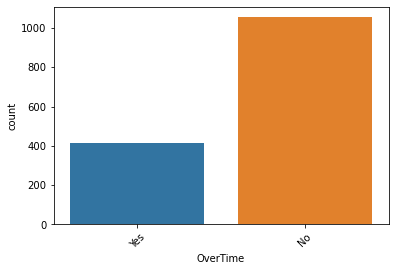

In [52]:
#Checking the unique values in categorical columns
for i in df.columns:
    if df[i].dtypes==object:
        sns.countplot(df[i])
        plt.xticks(rotation=45)
        plt.show()

Observations:

Attrition- Yes/No

Bussiness Travel- Travel_rarely/travel_frequently/non-travel

Departments- Sales/Research & Development/HR

Educational fields- Life science/other/medical/marketing/technical degree/human resources

Gender- male/female

Job role- sale executive/research scientist/laboratoey technician/manufacturing director/Healthcare representative/manager/sales representative/research director/human resources

Martial staus- single/married/divorced

over 18- yes

over time- yes/no



In [53]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Out of 1470 employees 237 have attrition- yes (left the company).

Lets check the factors for attrition:

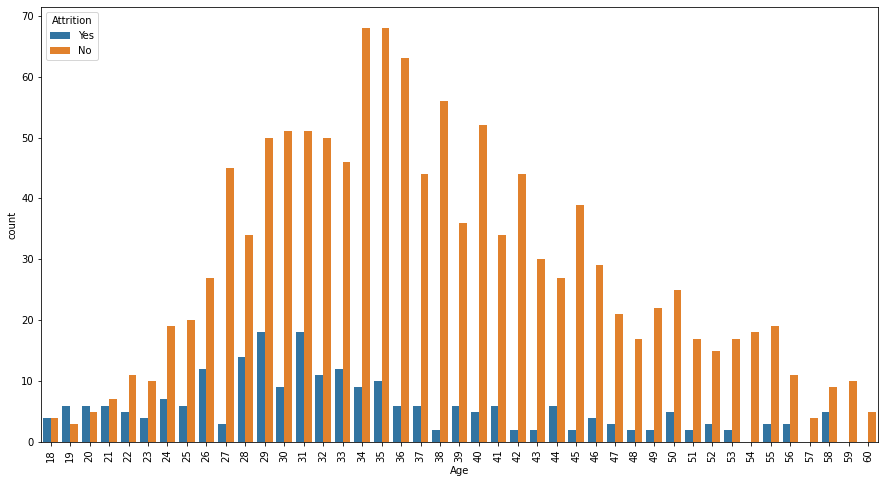

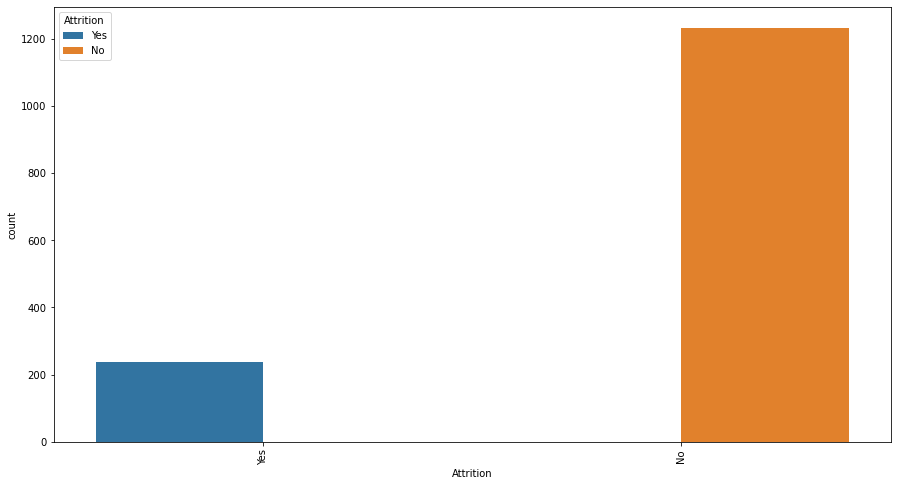

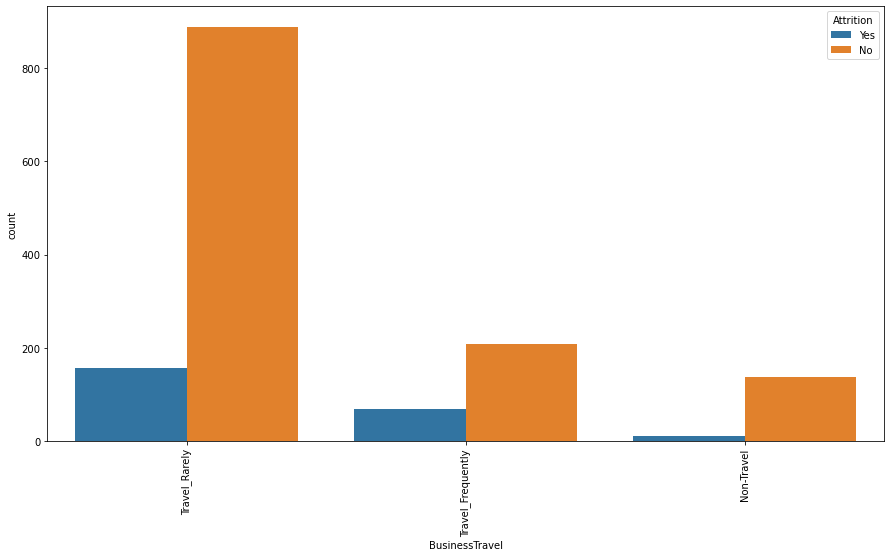

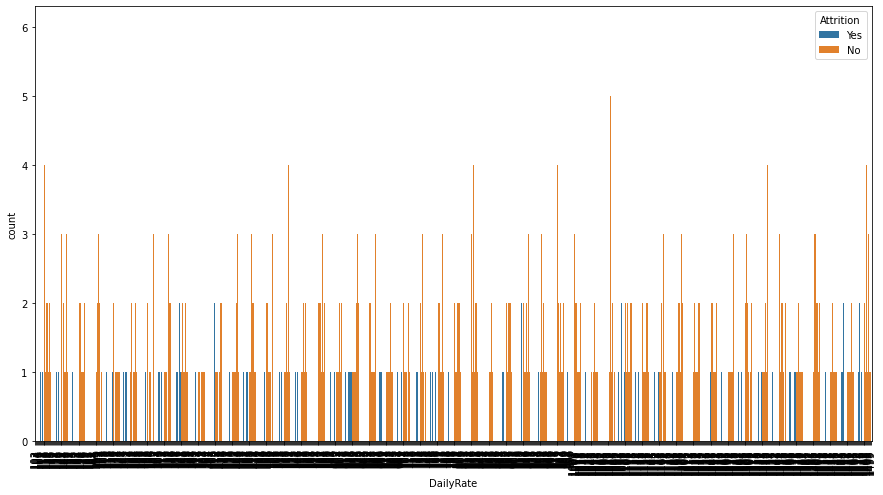

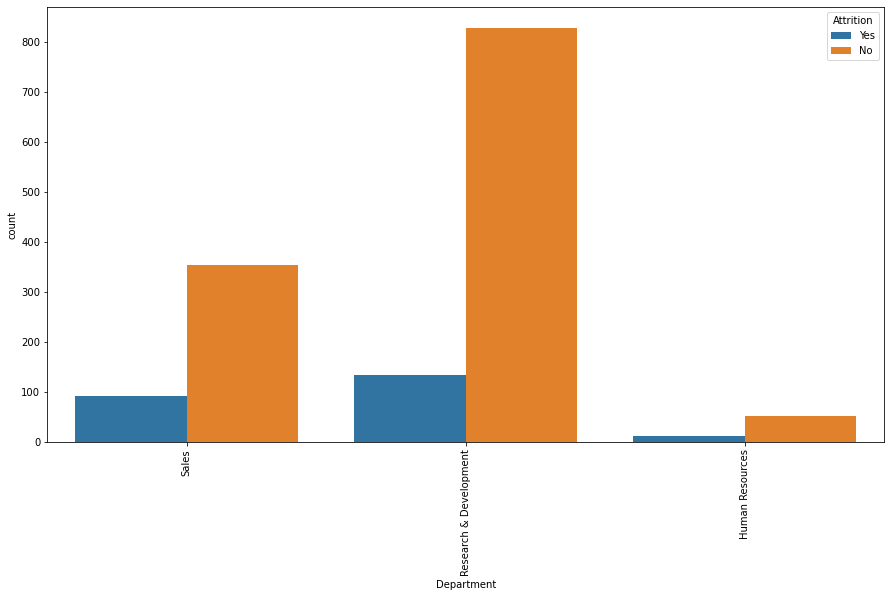

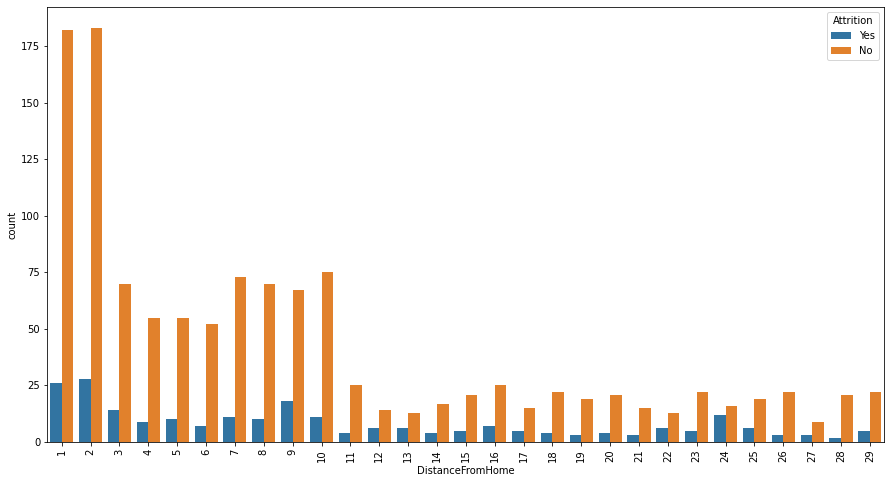

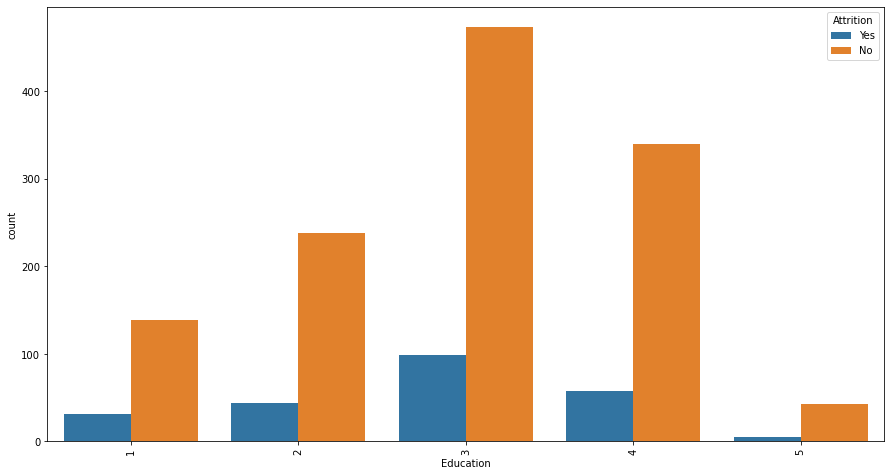

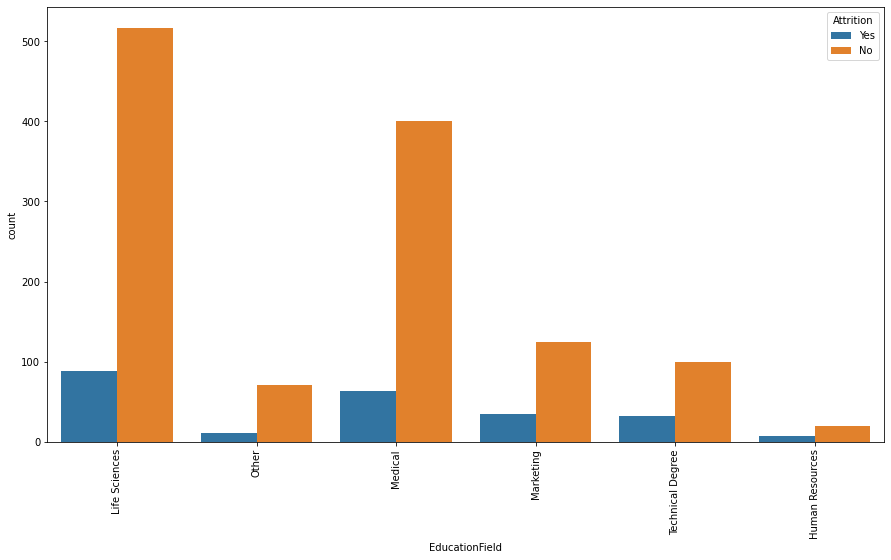

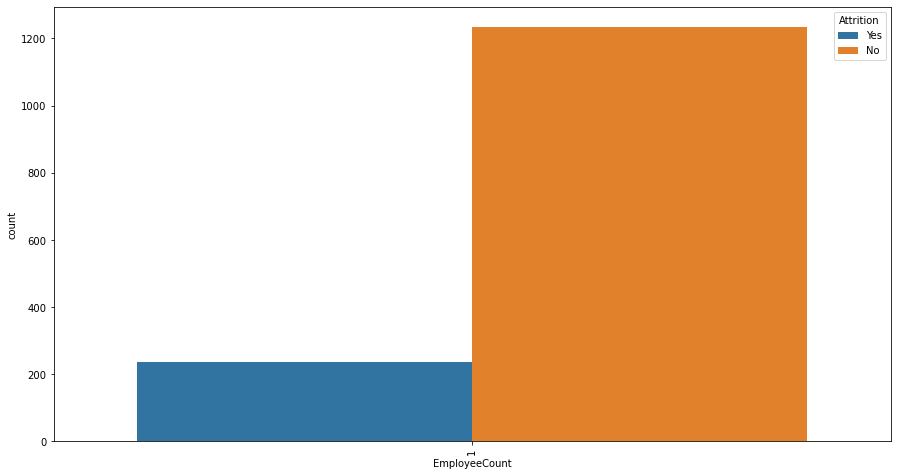

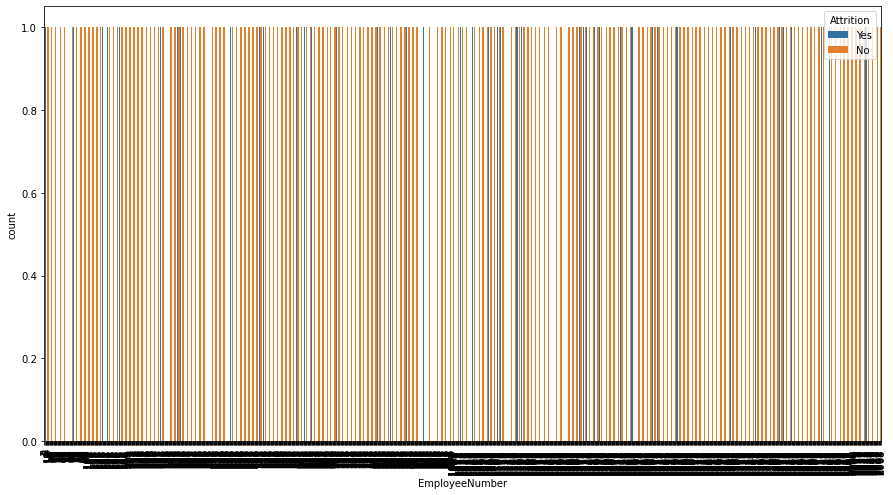

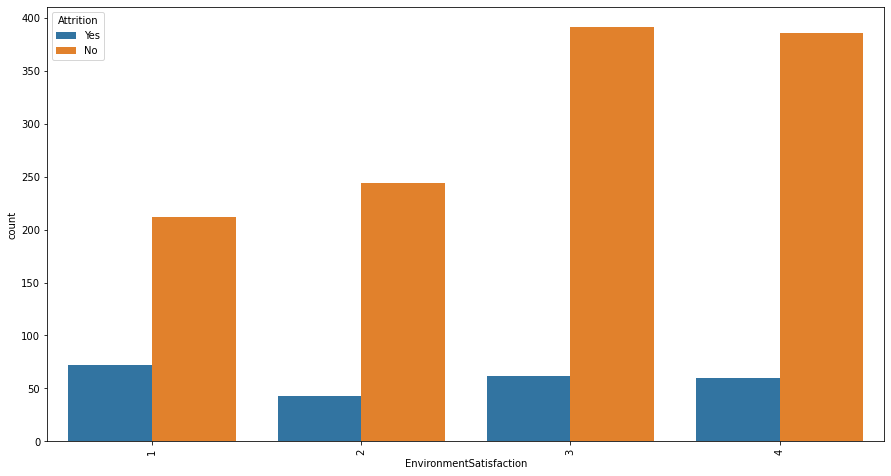

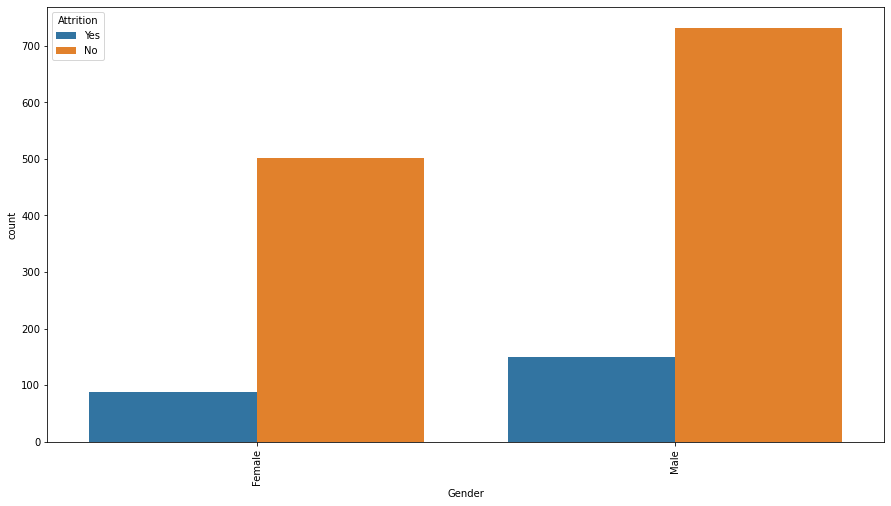

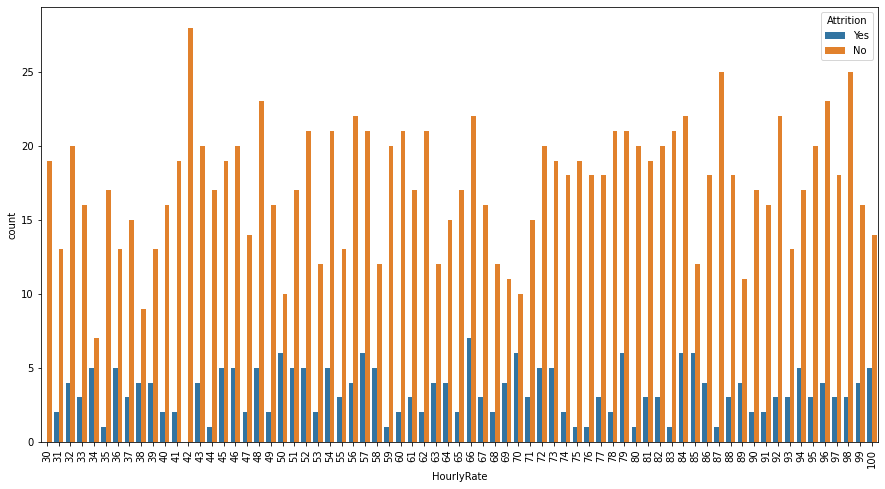

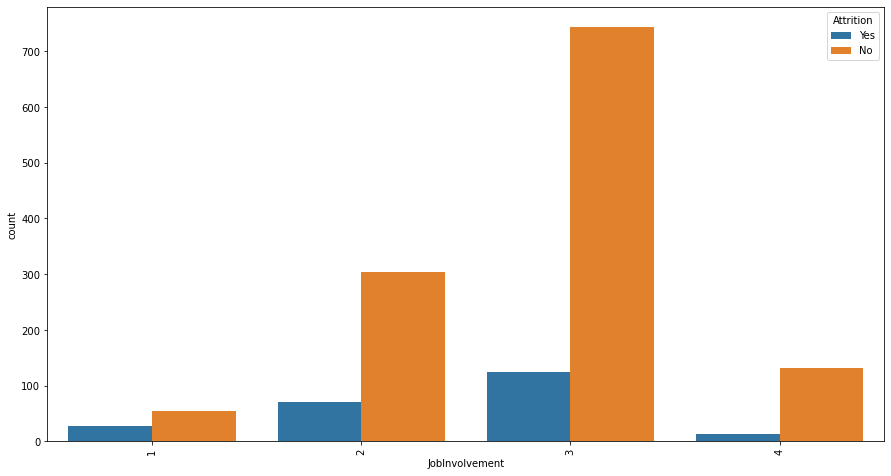

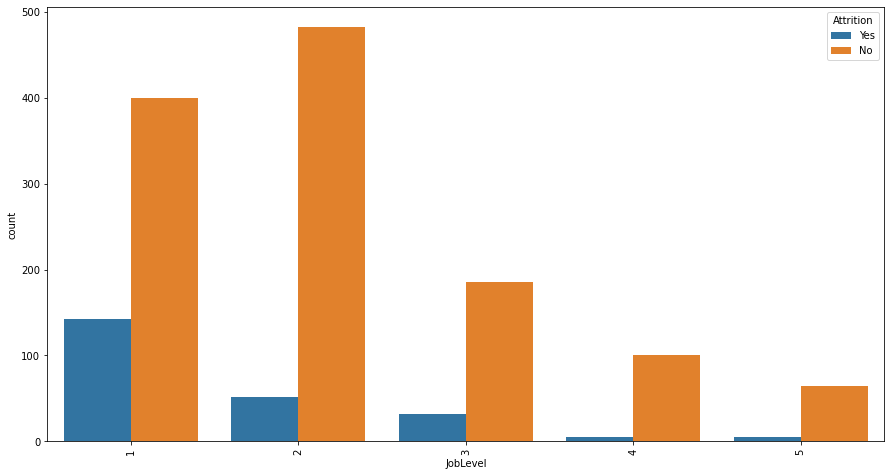

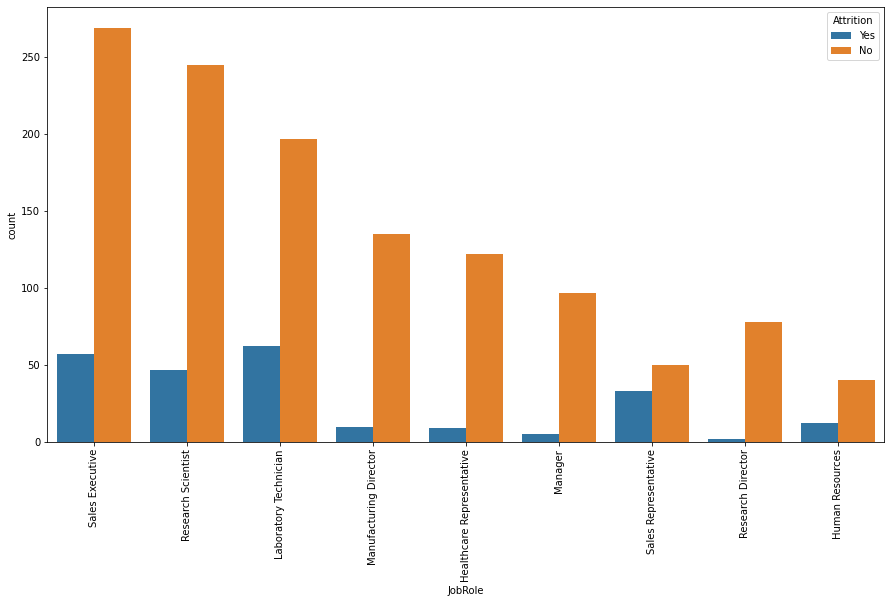

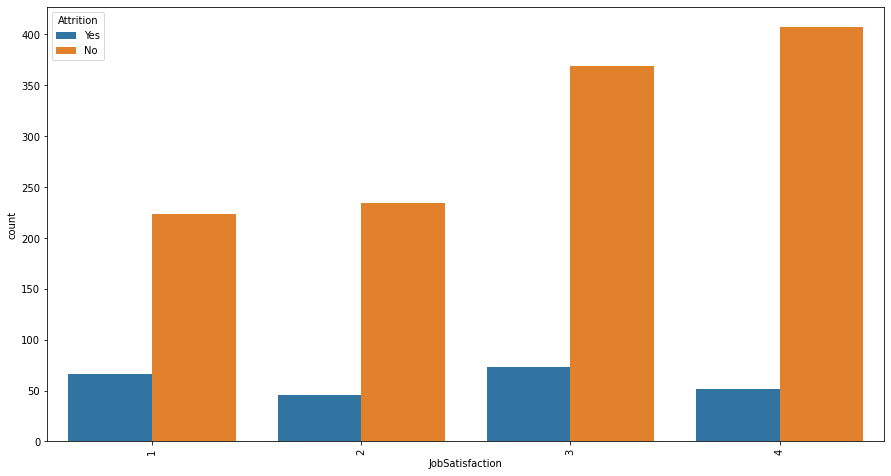

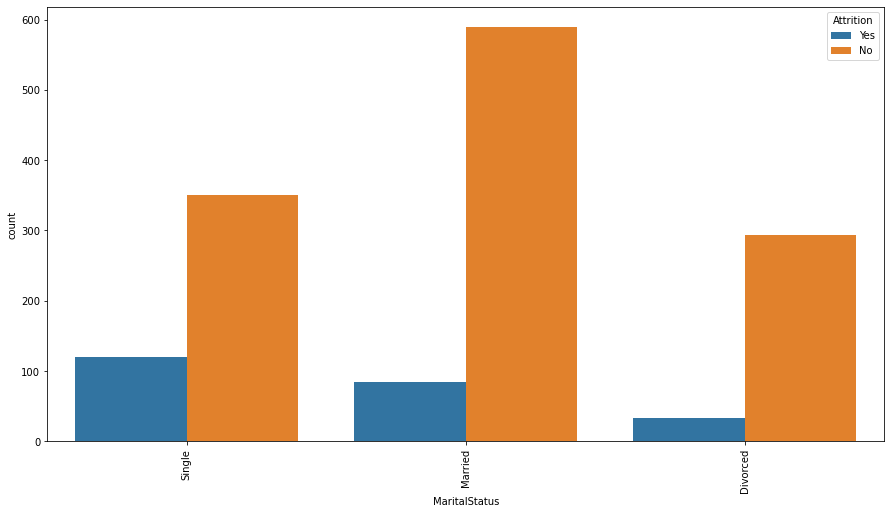

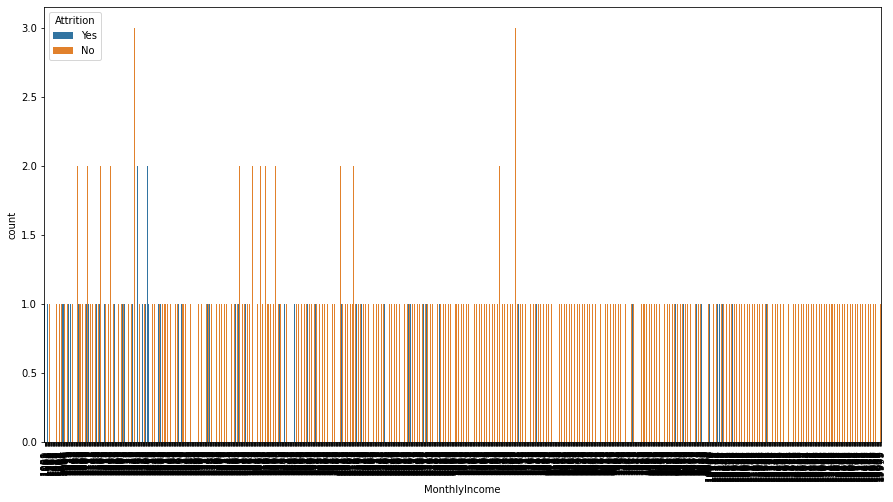

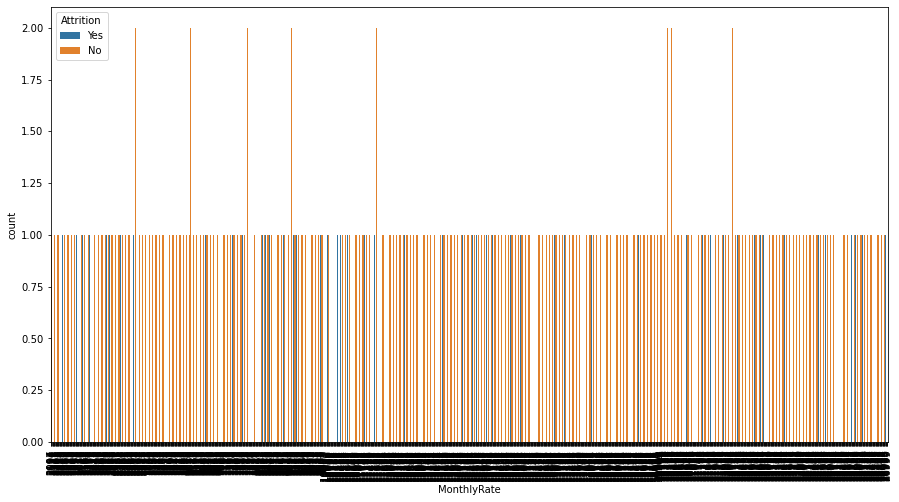

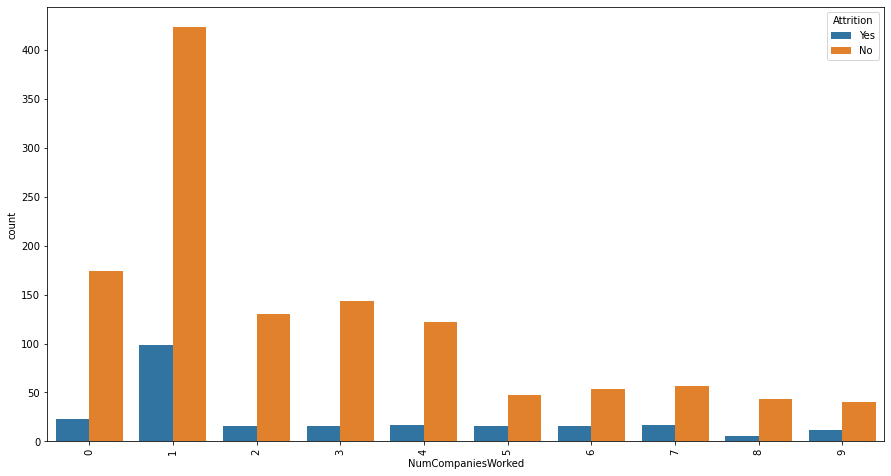

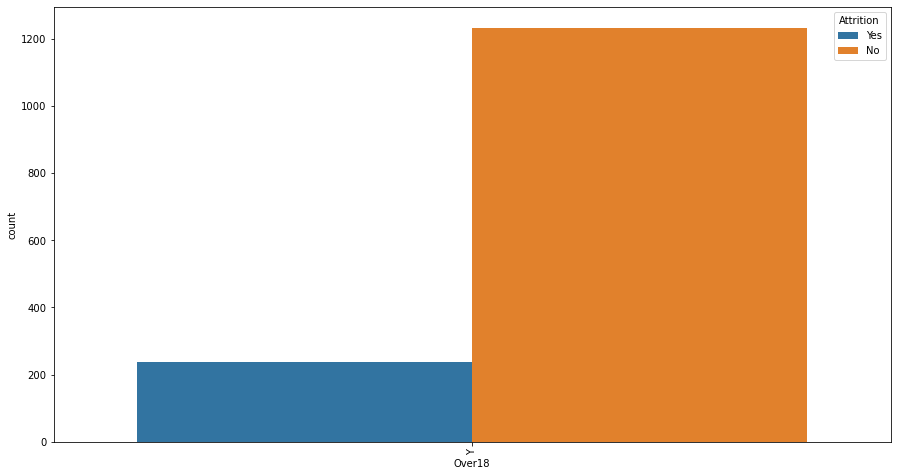

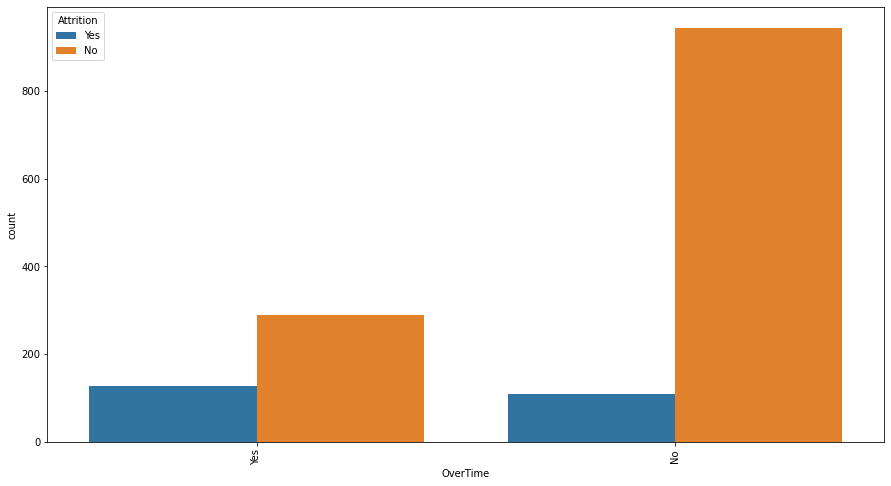

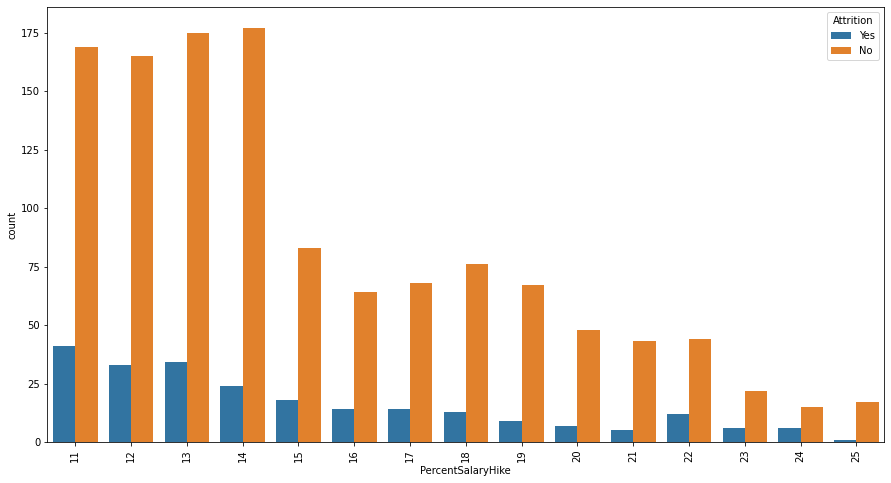

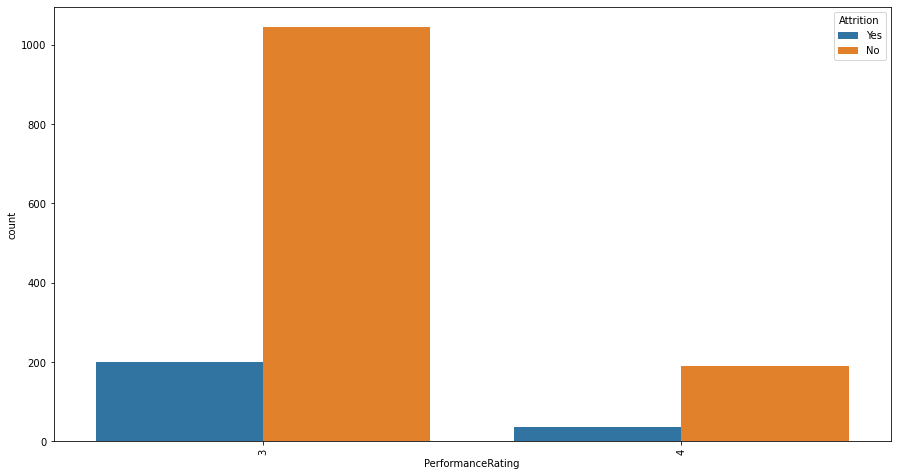

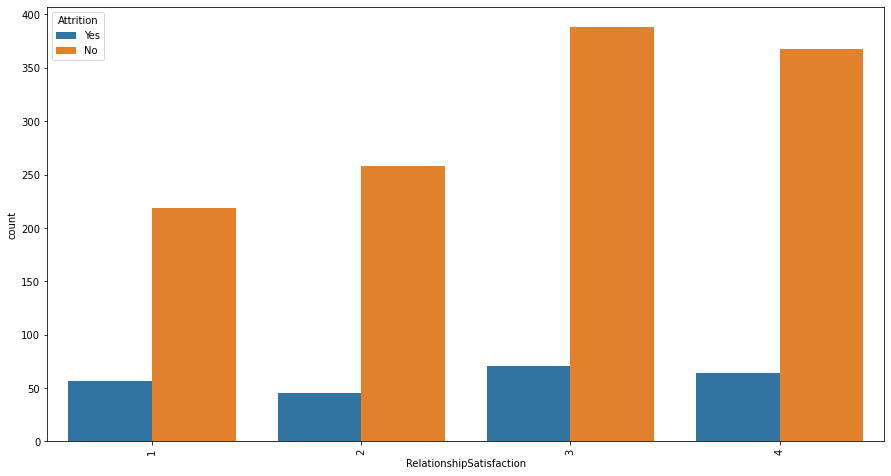

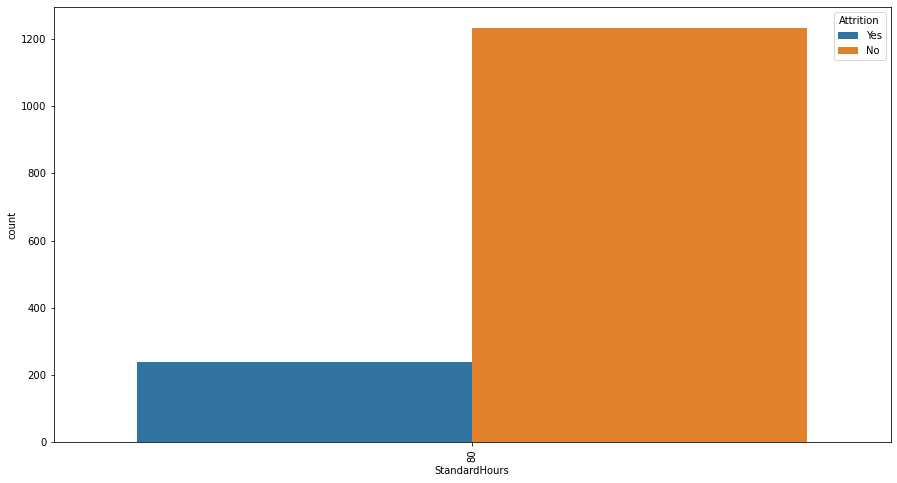

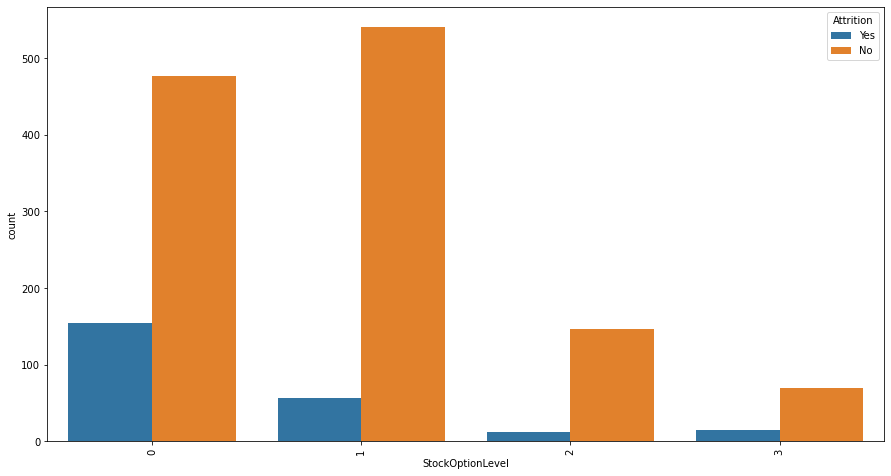

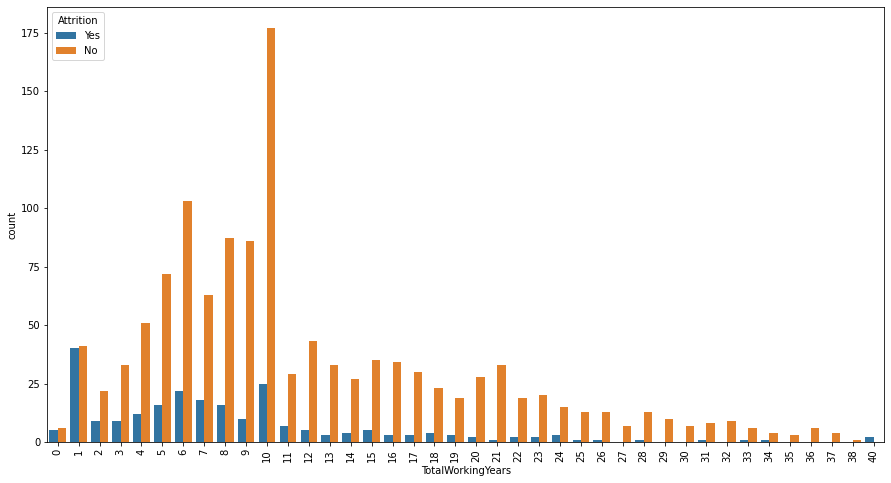

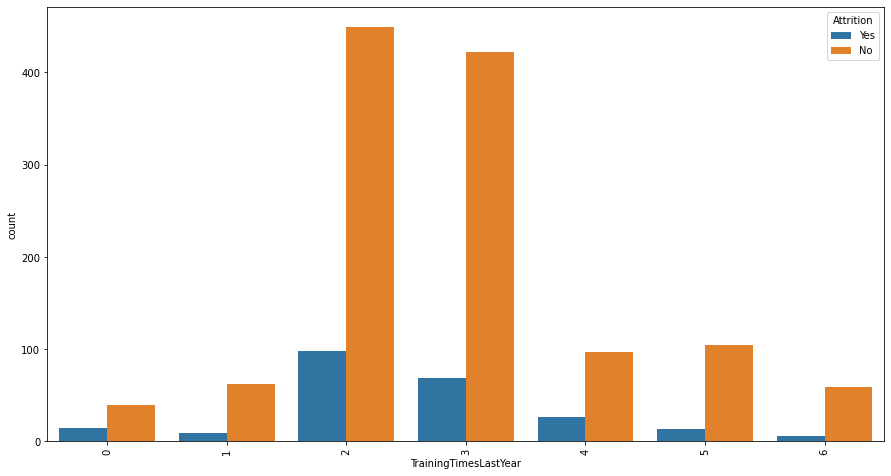

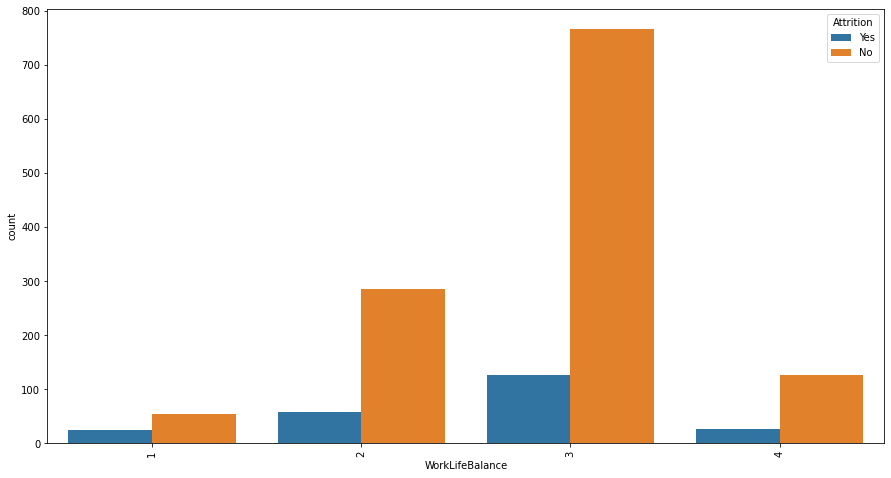

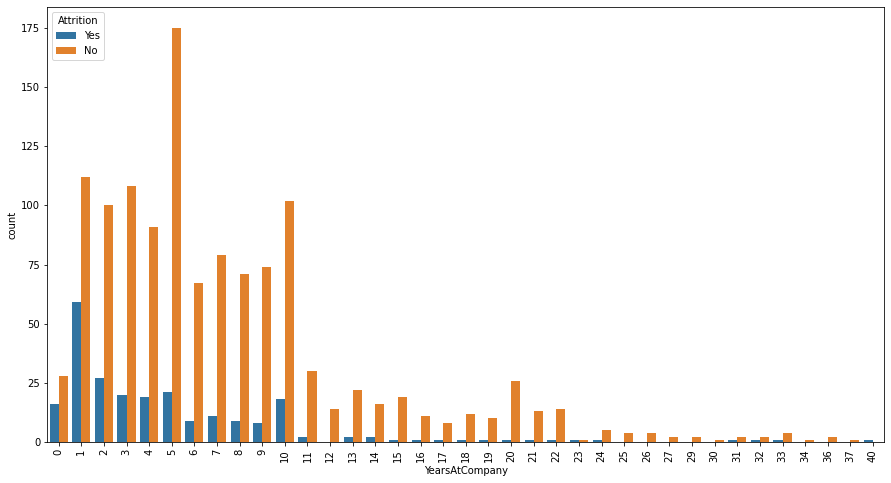

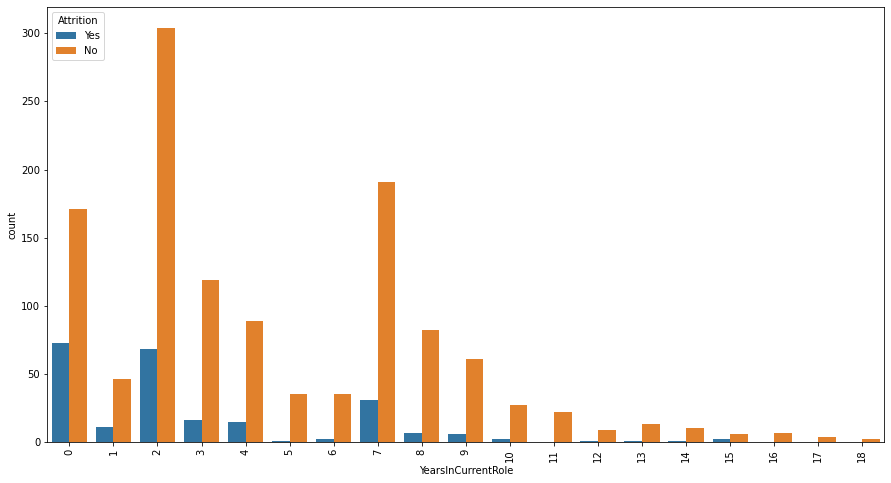

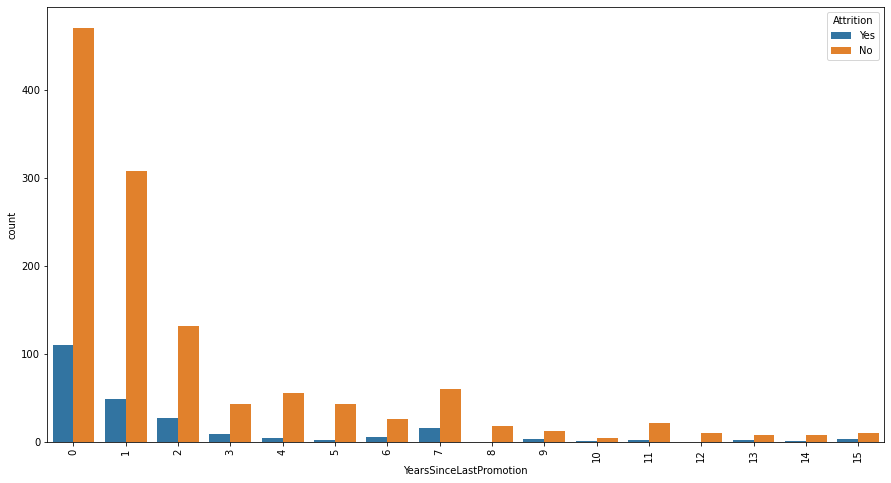

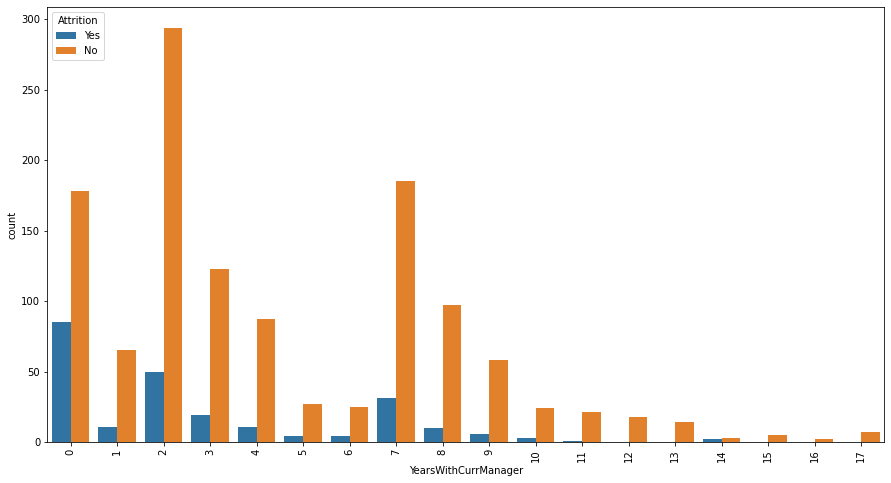

In [54]:
for i in df.columns:
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[i],hue='Attrition',data=df)
    plt.xticks(rotation=90)
    plt.show()

Observations:

Employees aged 29-31 years tends to leave the company than other age group.

The employees who travell rarely have left the company more than those who have travelled frequently or have not travelled.

Employess in R&D department are likely to leave the company then other departments.

Employees who live closer(1-2km) to the company have opted to leave the company.

Employees who's education level is 3 have left the company than employees have other educational level.

Employees with education field of life scince are likely to leave the company.

Employees having environment satisfaction level 2 are not likely to leave the company.

Male employees tends to leave the company more than female employees.

Employees having job involvement level 3 are more likely to leave the company.

Employees with job level 1 are more likely to leave the company.

Laboratory technicians tends to leave the company than other job roles.

Employees with job satisfaction 1 and 3 are likely to leave the company.

Employees who are single are likely to leave the company.

Employees who have worked in 1 company previously are likely to leave the company.

Employees who are doing overtime are likely to leave the company.

Employees with the lowest salary hike i.e, 11% are likely to leave the company, employees having high salary hike opted to stay in the same company.

Employees with performance level 3 are likely to leave the company.

Employees having higher relationship satisfaction (3 & 4) are likely to leave the company.

Employees having stock option level 0 are likely to leave the company.

Most of the employees leave the company after 1 year of working.

Employees with training time of 2 & months in the previous year have left the company, those who have training time of 6 months have opted to remain in the company.

Employees having work life balance of 3 are likely to leave the company.

Employees who are workng in the same role from last 0 & 2 years  are likely to leave the company.

Employees who are recently promoted are likely to leave the company.

Employees having 0 years with their current manager are likely to leave the company.

All the employees are over 18 years of age.


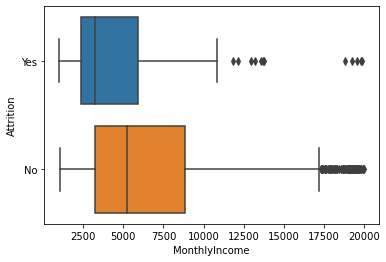

In [55]:
sns.boxplot(x='MonthlyIncome', y='Attrition',data=df)

Employees having low monthly income have opted to laeve the company than those who have higher monthly income.

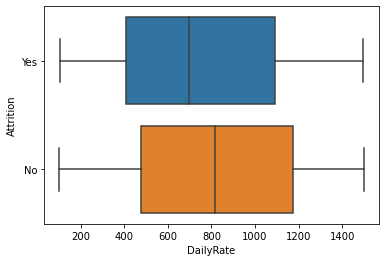

In [56]:
sns.boxplot(x='DailyRate', y='Attrition',data=df)

Daily rates doesn't affect the attrition much.

In [57]:
#Lets remove the unecessay columns(over 18- same for all, standard hours- same for all, employee number and employee count- doesn't contribute in attrition, )
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1, inplace=True)

In [58]:
df.shape

(1470, 31)

Now we have 1470 rows and 31 columns.

In [59]:
#Separating numerical and categorical data
df_num = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]


In [60]:
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,94,2,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,61,3,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,92,4,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,56,4,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,40,1,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [61]:
df_cat=df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus' , 'OverTime']]

In [62]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [63]:
df_num.shape

(1470, 23)

In [83]:
from sklearn import preprocessing
df_cat=df_cat.apply(preprocessing.LabelEncoder().fit_transform)

In [84]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


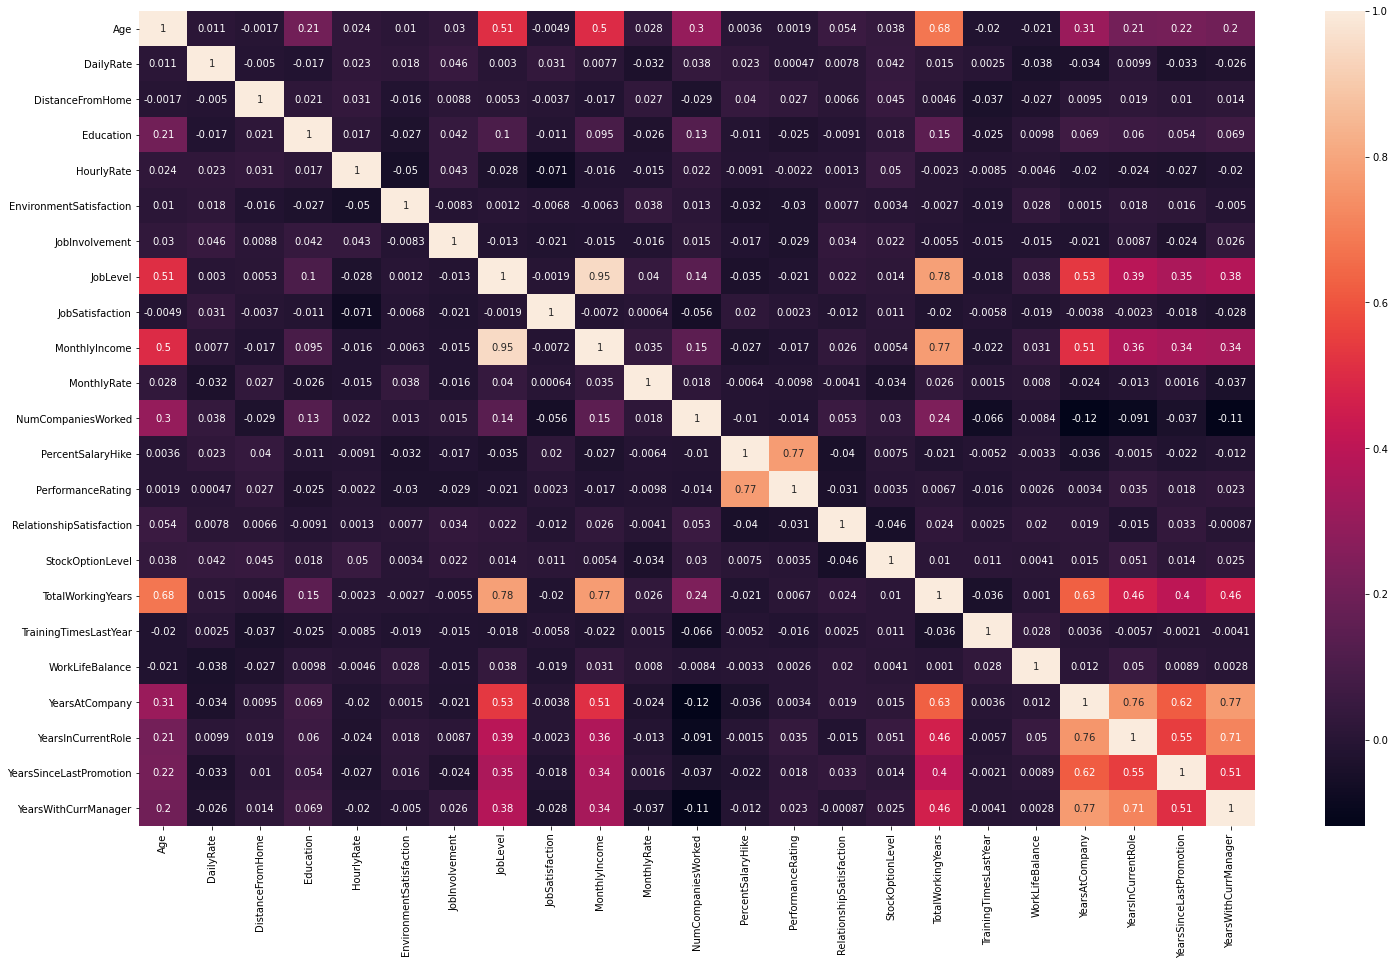

In [67]:
#checking correlation
plt.figure(figsize=(25,15))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

Observations:
  
Job level and monthly income has a strong correlation.

Performance rating has a strong correlation with the salary hike. Higher the performance rating higher the salary hike.

Monthly income is positively correalted with total working hour.

Years at company is positively correlated with years in current role and years with current manager.



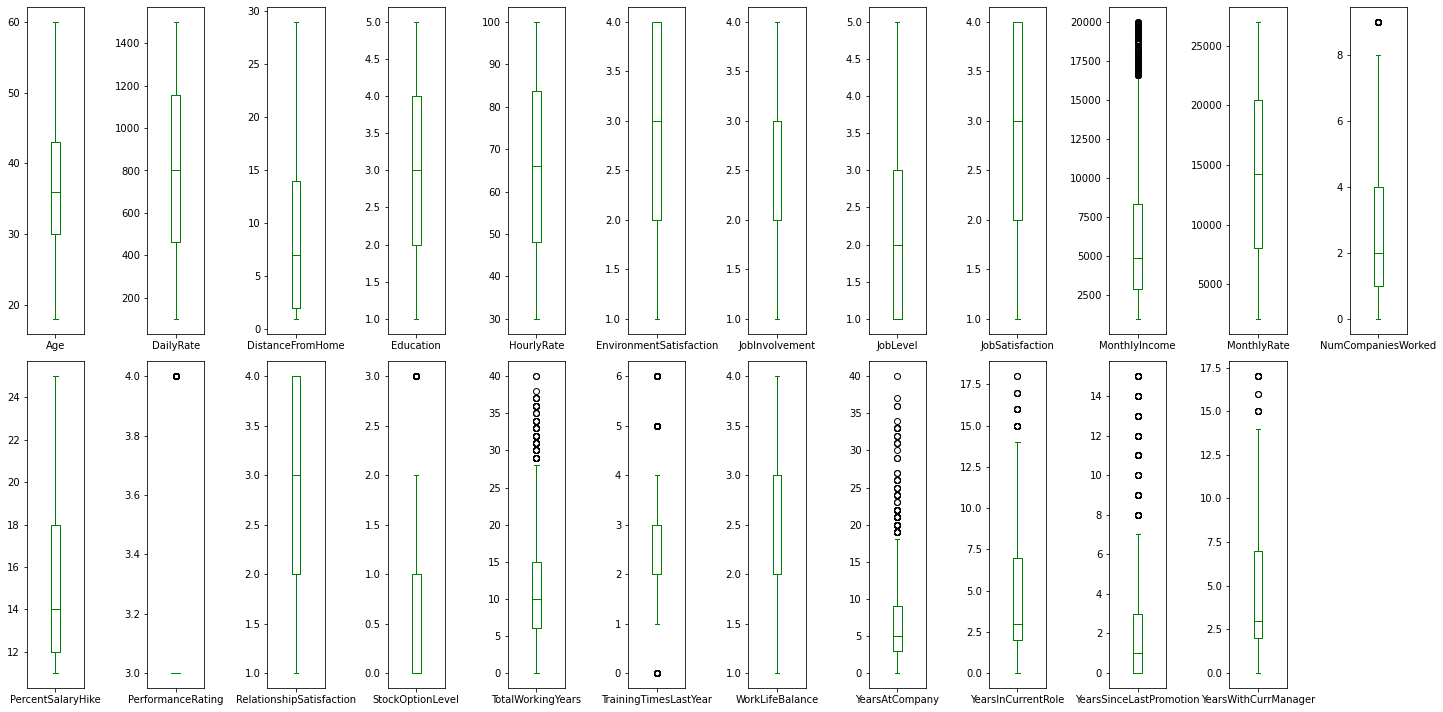

In [73]:
#Checking outliers
df_num.plot(kind='box',subplots=True,layout=(2,12),figsize=(20,10),color='green')
plt.tight_layout()

In [74]:
from scipy.stats import zscore
zscr=np.abs(zscore(df_num))
threshold=3
print(np.where(zscr>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([22, 21, 19, 21, 20, 21, 16, 16, 19, 21, 20, 21, 22, 16, 19, 21, 22,
       21, 16, 22, 19, 20, 21, 20, 22, 19, 21, 16, 19, 20, 21, 21, 22, 16,
       19, 19, 21, 21, 16, 20, 19, 19, 21, 19, 22, 21, 19, 16, 19, 21, 22,
       16, 22, 19, 21, 

In [75]:
print('shape before removing the outliers:' , df_num.shape)
df_new=df_num[(zscr<3).all(axis=1)]
print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (1470, 23)
shape after removing outliers : (1387, 23)


There are only 13 outliers and in boxplot we have seen that those are very close to the maximum. Therefore we are not removing these.

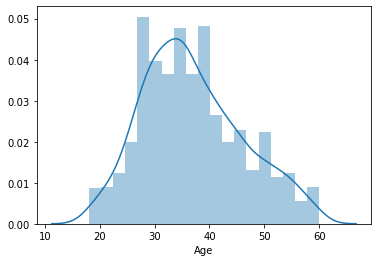

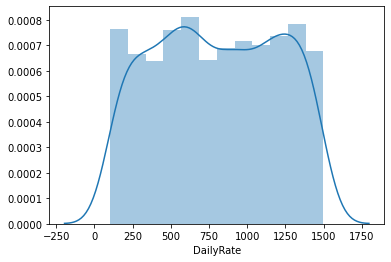

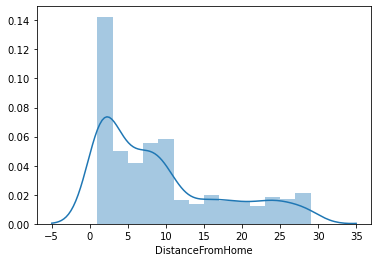

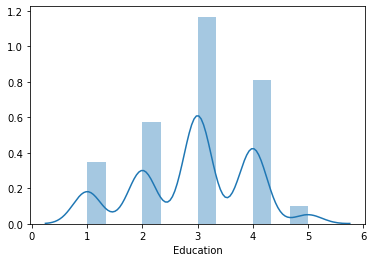

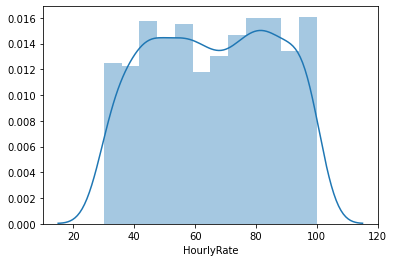

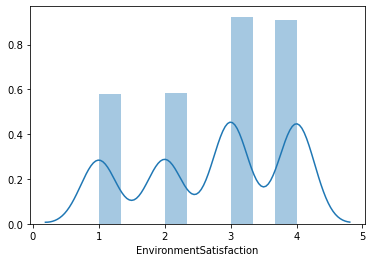

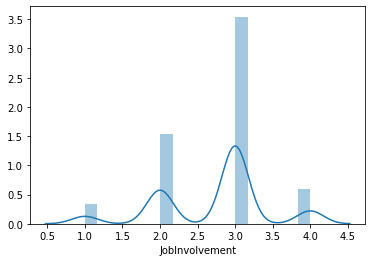

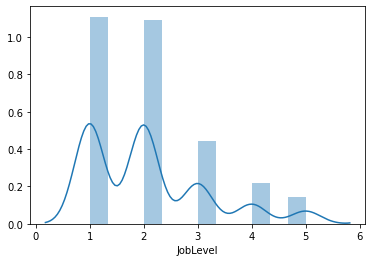

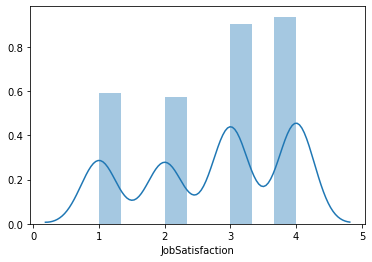

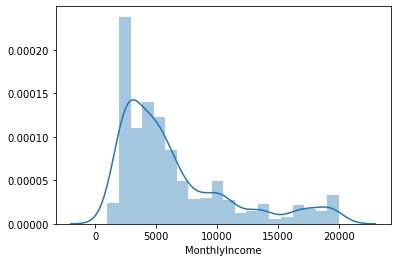

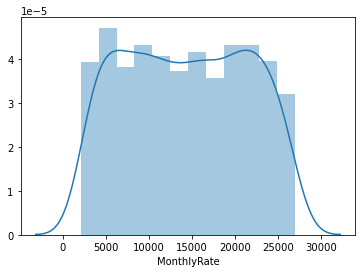

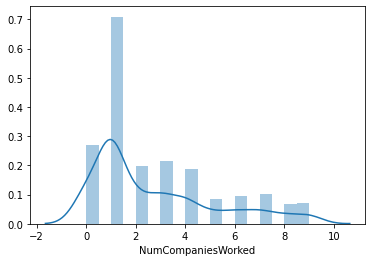

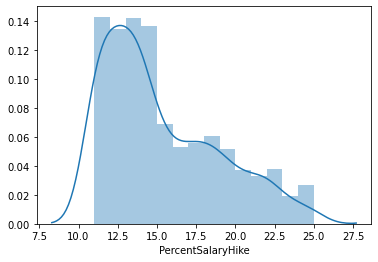

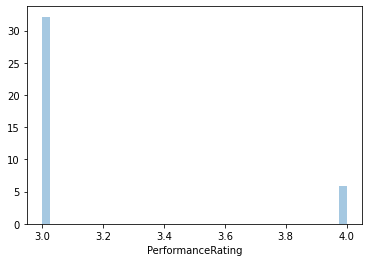

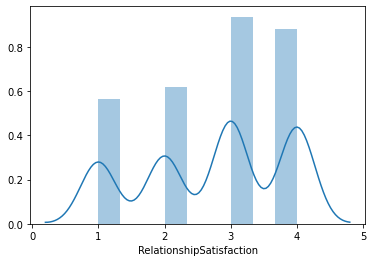

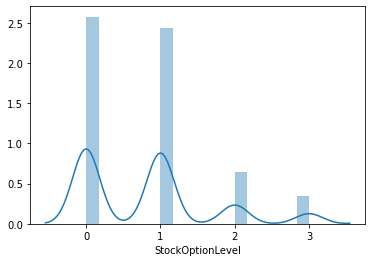

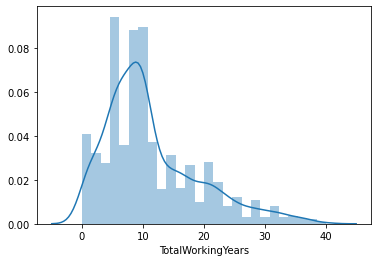

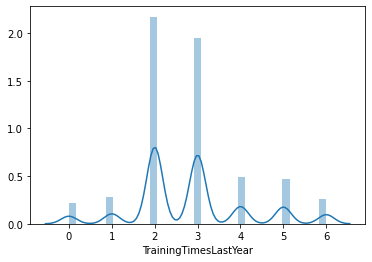

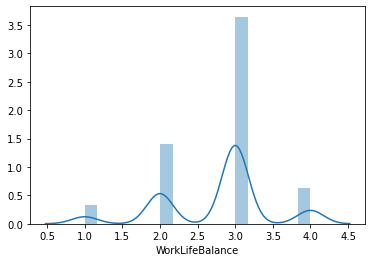

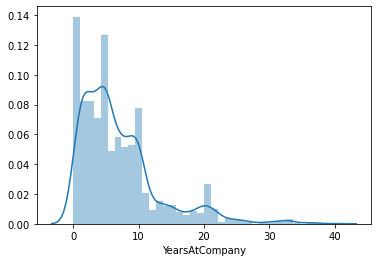

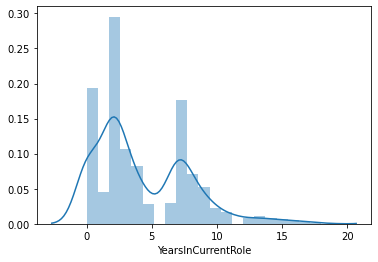

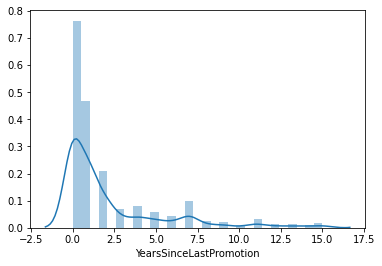

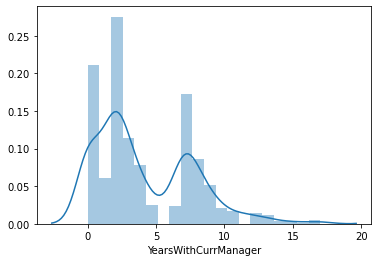

In [79]:
#Cheking distribution of the data
for i in df_num.columns:
    sns.distplot(df_num[i],kde=True)
    plt.show()

In [85]:
#concating the numerical and categorical dataframe
df_hr=pd.concat([df_cat,df_num],axis=1)

In [86]:
df_hr.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,1,41,1102,1,2,94,2,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,49,279,8,1,61,3,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,1,37,1373,2,2,92,4,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,1,33,1392,3,4,56,4,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,27,591,2,1,40,1,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [87]:
#Seperating target and independent variable
x=df_hr.iloc[:,1:]
y=df_hr.iloc[:,0]

In [88]:
x.shape,y.shape

((1470, 30), (1470,))

# Finding the best random state:

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8752834467120182 on random state 123


In [91]:
#spliting train and test data at random state 123
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [93]:
lr=LogisticRegression()
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()


In [98]:
model=[lr,gnb,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')

accuracy score: LogisticRegression()
0.8435374149659864
[[367   1]
 [ 68   5]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       368
           1       0.83      0.07      0.13        73

    accuracy                           0.84       441
   macro avg       0.84      0.53      0.52       441
weighted avg       0.84      0.84      0.78       441

Cross Validation Score: 0.8428571428571429
auc score: 0.5328878796902918


accuracy score: GaussianNB()
0.8458049886621315
[[331  37]
 [ 31  42]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       368
           1       0.53      0.58      0.55        73

    accuracy                           0.85       441
   macro avg       0.72      0.74      0.73       441
weighted avg       0.85      0.85      0.85       441

Cross Validation Score: 0.7870748299319728
auc score: 0.7373994937462776


accuracy score: RandomForestClassifier()
0.854

AdaBoostClassifier is performing best with accuracy score & cross validation score  of 87%.



# Hyper parameter tuning:

In [99]:
from sklearn.model_selection import GridSearchCV
#creating parameter list of AdaBoost Classifier
parameters={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1]}
GCV=GridSearchCV(ada,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 200, 300]})

In [100]:
#Lets check the best parameters
GCV.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [101]:
predgcv=GCV.best_estimator_.predict(x_test)

In [102]:
print('accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
score=cross_val_score(GCV.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

accuracy score:
0.8684807256235828
[[362   6]
 [ 52  21]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       368
           1       0.78      0.29      0.42        73

    accuracy                           0.87       441
   macro avg       0.83      0.64      0.67       441
weighted avg       0.86      0.87      0.84       441

Cross Validation Score: 0.8734693877551021
auc score: 0.6356834425253127


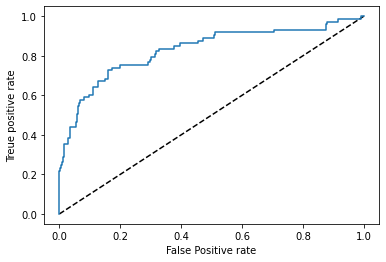

In [103]:
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost classifier')
plt.xlabel('False Positive rate')
plt.ylabel('Treue positive rate')
plt.show()

In [104]:
#Lets save our model
import joblib
joblib.dump(GCV.best_estimator_,'HR_ada.obj')

['HR_ada.obj']